In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification
import seaborn as sns

sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")


#### Loss function of Logistic Regression:

$$\sigma(t) = \frac{e^t}{1+e^t} = \frac{1}{1+e^{-t}}$$ 
And so that we have a new  negative log-likelihood function as our loss function:

$$l(\theta) = \frac{1}{m}\sum_{i=1}^m(-y_i\theta^Tx_i + ln(1+ e^{\theta^Tx_i})) $$


And this loss function is differentiable w.r.t $\theta$, if we apply first-order optimization techniques, such as **Gradient Descent, SGD**, we can easily get the results.

$$\frac{\partial l(\theta)}{\partial \theta} = - \sum_{i=1}^m x_i(y_i - p_1(x_i;\theta)) = \sum_{i=1}^m (\sigma(\theta^Tx_i) - y_i)x_i$$

And for the $j-th$ dimension, 
$$\frac{\partial l(\theta)}{\partial \theta_j} =  \sum_{i=1}^m (\sigma(\theta^Tx_i) - y_i)x_i^{(j)}$$
Where x already includes $1$ as for the intercept $b$



Today we are going to use @ as matrix product in numpy 
https://numpy.org/doc/stable/reference/generated/numpy.dot.html

In [2]:
a = np.array([1,2,3])
b = np.array([1,2,3])
a@b

14

In [3]:
class LR(object):
        
    def __init__(X, y, learning_rate=0.03, iterations=1500, epsilon = 1e-5):
        ## Training Data
        self.X = X
        self.y = y

        ## Hyperparameters
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.iterations = iterations

        ## initial parameters
        self.m = len(y)

        self.X = np.hstack((np.ones((m,1)), self.X))
        self.n = np.size(self.X,1)
        self.params = np.zeros((self.n,1))
        

    def sigmoid(self, t):
        return 1 / (1 + np.exp(-t))

    def loss_function(self, theta):

        m = len(self.y)
        h = self.sigmoid(self.X @ theta)

        ## Cost function based on our mathematical expression
        cost = (1/m)*(((-y).T @ np.log(h + self.epsilon))-((1-y).T @ np.log(1-h + self.epsilon)))
        
        return cost

    def gradient_descent(self):
        m = len(y)
        cost_history = np.zeros((self.iterations,1))

        for i in range(self.iterations):
            self.params = self.params - (self.learning_rate/m) * (X.T @ (self.sigmoid(self.X @ self.params) - self.y)) 
            cost_history[i] = loss_function(self.X, self.y, self.params)

        return (cost_history, params)

    def predict(self, new_X):
        return np.round(self.sigmoid(new_X @ self.params))

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def loss_function(X, y, theta):
    
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    ## Cost function based on our mathematical expression
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    
    return cost

In [6]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = loss_function(X, y, params)

    return (cost_history, params)

In [7]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [8]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
y = y.reshape(len(y), -1)

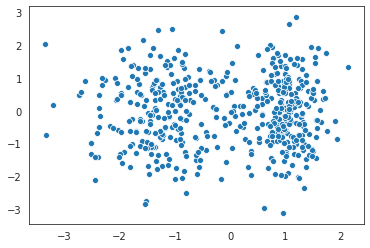

In [9]:
sns.scatterplot(X[:,0], X[:,1])

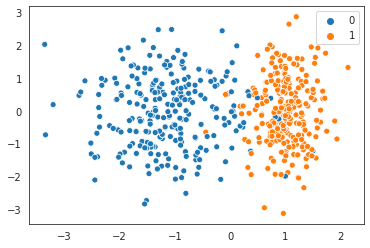

In [10]:
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

In [11]:
## Hyperparameters & initial states
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

Initial Loss is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



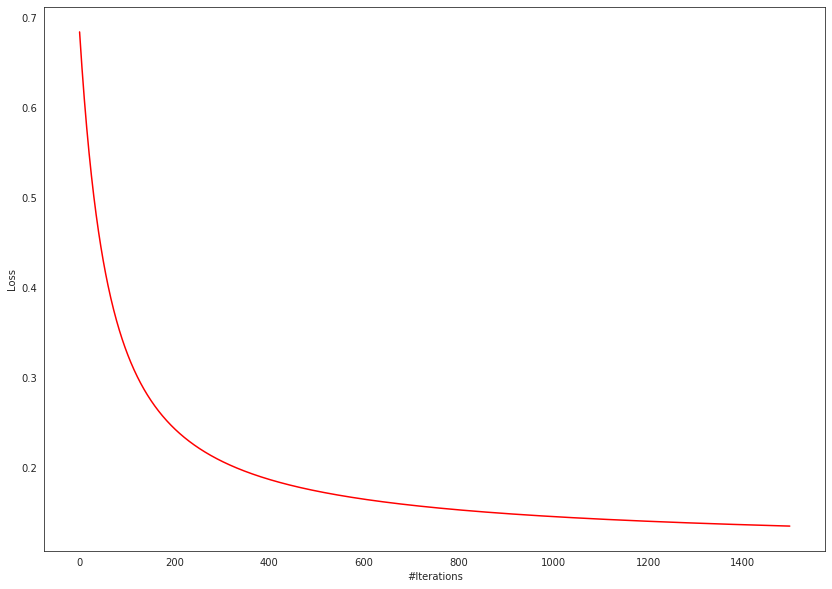

In [12]:
initial_loss = loss_function(X, y, params)

print("Initial Loss is: {} \n".format(initial_loss))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

fig = plt.figure(figsize=(14,10))
ax = plt.axes()

ax.plot(range(len(cost_history)), cost_history, 'r')

ax.set_xlabel("#Iterations")
ax.set_ylabel("Loss");


In [13]:
import pandas as pd
from textblob import Word
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords

In [14]:
## NLP Pre-processings
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')

food_sets = wn.synsets('food')
food_stop_words = list()
for food_set in food_sets:
    food_stop_words += list(set([w.replace('_', ' ') for s in
                            food_set.closure(lambda s: s.hyponyms())
                            for w in s.lemma_names()]))

[nltk_data] Downloading package stopwords to /home/rw2694/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rw2694/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
## Load Data
df = pd.read_json('review0.json', lines=True)
df.head(5)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,v0i_UHJMo_hPBq9bxWvW4w,bv2nCi5Qv5vroFiqKGopiw,0W4lkclzZThpx3V65bVgig,5,2016-05-28,"Love the staff, love the meat, love the place....",0,0,0
1,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
2,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
3,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
4,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0


In [16]:
## X - text -> numeric data, y : stars
cleaned_df = df[['stars', 'text']]
cleaned_df = cleaned_df[pd.notnull(cleaned_df['text'])]
cleaned_df.columns = ['rating', 'review']

In [17]:
cleaned_df['bin'] = pd.cut(cleaned_df['rating'], [0, 3, float('inf'
                           )], labels=[0, 1])

# Set Dataframe to lower

cleaned_df['review'] = cleaned_df['review'].apply(lambda x: \
        ' '.join(x.lower() for x in x.split()))


In [18]:
cleaned_df

,rating,review,bin
0,5,"love the staff, love the meat, love the place....",1
1,5,super simple place but amazing nonetheless. it...,1
2,5,small unassuming place that changes their menu...,1
3,5,lester's is located in a beautiful neighborhoo...,1
4,4,love coming here. yes the place always needs t...,1
...,...,...,...
4995,4,came here again for a business dinner. we orde...,1
4996,3,"noodle asia is inside the venetian hotel, in t...",0
4997,4,visiting las vegas and need a pho fix? tired o...,1
4998,3,the saint laurent street corridor has a host o...,0


In [19]:
# Remove symbols

cleaned_df['review'] = cleaned_df['review'].str.replace('[^\w\s]', '')

# Lemmatize

cleaned_df['review'] = cleaned_df['review'].apply(lambda x: \
        ' '.join([Word(word).lemmatize() for word in x.split()]))

In [20]:
# Add Sentiment column
cleaned_df['sentiment'] = cleaned_df['review'].apply(lambda x: \
        TextBlob(x).sentiment[0])

# Remove stop words
cleaned_df['review'] = cleaned_df['review'].apply(lambda x: ' '.join(x
        for x in x.split() if x not in stop))
cleaned_df['review'] = cleaned_df['review'].apply(lambda x: ' '.join(x
        for x in x.split() if x not in food_stop_words))

In [21]:
cleaned_df.head(5)

,rating,review,bin,sentiment
0,5,love staff love love place prepare long line a...,1,0.131481
1,5,super simple place amazing nonetheless around ...,1,0.251389
2,5,small unassuming place change every often cool...,1,0.320833
3,5,lesters located beautiful neighborhood ha sinc...,1,0.450000
4,4,love coming yes place always need floor swept ...,1,0.129688


In [22]:
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5,
    norm='l2',
    encoding='latin-1',
    ngram_range=(1, 2),
    stop_words=food_stop_words,
    )

In [23]:
# Convert the reviews to tf-idf features
features = tfidf.fit_transform(cleaned_df.review)

# Obtain the class labels 'bin'
labels = cleaned_df.bin

# Add column for sentiment
features = hstack((features, np.array(cleaned_df['sentiment'])[:,
                  None]))

# Print the shape (row, columns)

print (features.shape)

(5000, 11796)


In [24]:
## For LogisticRegression Training
features_array = features.toarray()
labels = labels.astype(int)
labels_array = np.array(labels).reshape(len(labels), -1)

In [25]:
y = labels_array
X = features_array

m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

In [26]:
np.unique(y)

array([0, 1])

In [27]:
iterations = 4000
learning_rate = 0.1

initial_cost = loss_function(X, y, params)

Initial Loss is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.21176676]
 [-0.091789  ]
 [ 0.00769157]
 ...
 [ 0.01892067]
 [-0.00773599]
 [ 5.05007508]] 



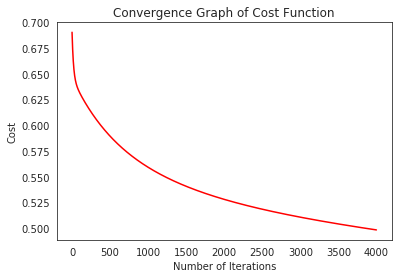

In [28]:
print("Initial Loss is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [29]:
LR = LogisticRegression()
LR.fit(features,labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
LR.coef_

array([[-0.33692029,  0.08763153, -0.2042417 , ...,  0.18419442,
        -0.12608837,  4.81533388]])

In [30]:
LR.intercept_

array([0.04381404])